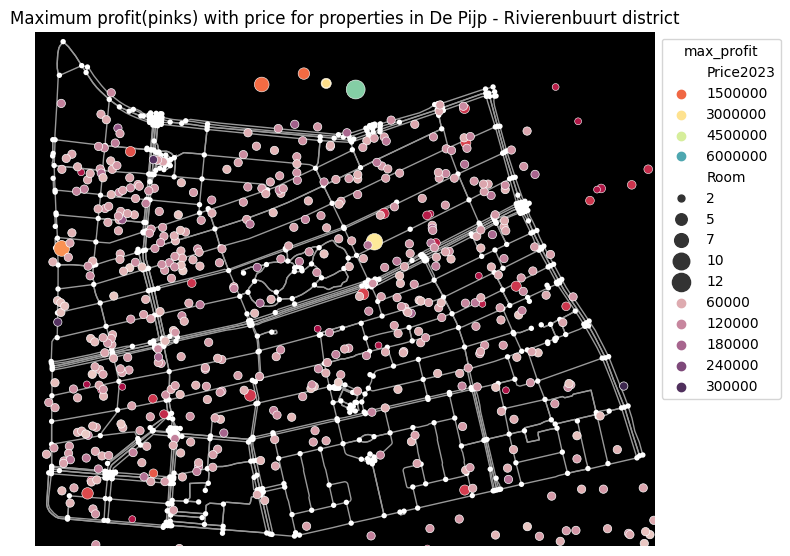

In [3]:
import osmnx as ox
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

place_name = "De Pijp, Amsterdam, Netherlands"
G = ox.graph_from_place(place_name, network_type='all')
df = pd.read_csv('listings_am.csv')
df['price_as_int']=df.price.str.replace('[\$\,\.]','',regex=True).astype(int)/100
df.loc[:, 'day']=365-df['availability_365']
df.loc[:, 'max_profit']=df['day']*df['price_as_int']

house_price = pd.read_csv('HousingPrices.csv')
#calculation of current prices
house_price['Price2022']=house_price['Price']*1.15
house_price['Price2023']=house_price['Price2022']*1.03
house_price_used=house_price[["Lon","Lat", "Room","Price2023"]]

used_columns=df[['max_profit','longitude' ,'latitude','neighbourhood_cleansed','room_type']]
De_Pijp=used_columns[used_columns['neighbourhood_cleansed']=='De Pijp - Rivierenbuurt']
types=De_Pijp[De_Pijp['room_type']=='Entire home/apt']
highest=types[types['max_profit']>10000]
fig, ax = ox.plot_graph(G, show=False, close=False,  bgcolor='black')
current_prices=sns.scatterplot(ax=ax,x='Lon',y='Lat',data=house_price_used,hue='Price2023', palette="Spectral", size="Room", sizes=(10,200))
prices_night=sns.scatterplot(ax=ax, x='longitude',y='latitude',data=highest,hue='max_profit', hue_norm=(0,350000))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("Maximum profit(pinks) with price for properties in De Pijp - Rivierenbuurt district")
plt.show()